<a href="https://colab.research.google.com/github/Lim0703/2022-2-ML-Class/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9B%90%EB%8B%AC%EB%9F%AC_%ED%99%98%EC%9C%A8_%EC%98%88%EC%B8%A1_LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/exchange_rate.csv')
df.set_index('date', inplace=True)
df

,usd,cny,jpy,eur
date,,,,
2016-01-04,1172.0,177.84,974.19,1272.26
2016-01-05,1184.3,179.19,992.42,1282.36
2016-01-06,1187.7,178.97,997.15,1277.37
2016-01-07,1193.9,179.05,1007.72,1286.61
2016-01-08,1199.7,179.04,1020.54,1310.37
...,...,...,...,...
2022-09-26,1408.4,198.40,981.53,1365.51
2022-09-27,1429.7,199.66,988.80,1374.08
2022-09-28,1427.2,199.31,985.43,1368.47


In [ ]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [ ]:
dfx = df[['usd','cny', 'jpy', 'eur']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['usd']]
dfx = dfx[['cny', 'jpy', 'eur']]
dfx

,cny,jpy,eur
date,,,
2016-01-04,0.432391,0.167722,0.371221
2016-01-05,0.467095,0.244142,0.415856
2016-01-06,0.461440,0.263970,0.393804
2016-01-07,0.463496,0.308279,0.434639
2016-01-08,0.463239,0.362021,0.539641
...,...,...,...
2022-09-26,0.960925,0.198491,0.783322
2022-09-27,0.993316,0.228967,0.821195
2022-09-28,0.984319,0.214840,0.796403


In [ ]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 환율(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 환율
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.9999999974293059, 0.16097254237645284, 0.9057804486009459], [0.9724935707647981, 0.17338084251797073, 0.9212038178711318], [0.9588688921365839, 0.14944456082605587, 0.9088739610620148], [0.9526992263426761, 0.13829385867185334, 0.8703818274392872], [0.9455012829164497, 0.1325508278631101, 0.8089093155343339], [0.9622107944416175, 0.23043387120920825, 0.8709121438611842], [0.9609254474012203, 0.19849088233138093, 0.7833215481777792], [0.9933161928192388, 0.22896667355733943, 0.8211949793082927], [0.984318763536456, 0.21483965616648928, 0.7964026865845846], [0.9778920283344681, 0.2577656674668767, 0.9212038178711318]] -> [0.9955133277921578]


In [ ]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 1655 1655


In [ ]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1158, 10, 3) (1158, 1)
테스트 데이터의 크기 : (497, 10, 3) (497, 1)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 3)))
model.add(Dropout(0.05))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            1920      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,221
Trainable params: 5,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
39/39 [==============================] - 3s 11ms/step - loss: 8.9698e-04
Epoch 2/70
39/39 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 3/70
39/39 [==============================] - 0s 11ms/step - loss: 9.0645e-04
Epoch 4/70
39/39 [==============================] - 0s 11ms/step - loss: 9.0375e-04
Epoch 5/70
39/39 [==============================] - 0s 12ms/step - loss: 8.9343e-04
Epoch 6/70
39/39 [==============================] - 0s 12ms/step - loss: 8.9031e-04
Epoch 7/70
39/39 [==============================] - 0s 11ms/step - loss: 8.8084e-04
Epoch 8/70
39/39 [==============================] - 0s 11ms/step - loss: 8.8701e-04
Epoch 9/70
39/39 [==============================] - 0s 11ms/step - loss: 8.8745e-04
Epoch 10/70
39/39 [==============================] - 0s 11ms/step - loss: 9.0498e-04
Epoch 11/70
39/39 [==============================] - 0s 12ms/step - loss: 8.8924e-04
Epoch 12/70
39/39 [==============================] - 0s 12ms/step - loss: 9.07

16/16 [==============================] - 0s 4ms/step


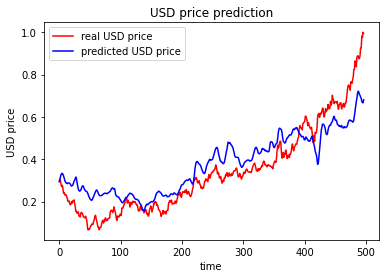

내일 USD 가격 : [981.58124] USD


In [ ]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real USD price')
plt.plot(pred_y, color='blue', label='predicted USD price')
plt.title('USD price prediction')
plt.xlabel('time')
plt.ylabel('USD price')
plt.legend()
plt.show()

print("내일 USD 가격 :", df.usd[-1] * pred_y[-1] / dfy.usd[-1], 'USD')